<a href="https://colab.research.google.com/github/NourEldin-Osama/Python-Projects/blob/main/CV/UTk_Face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
from IPython.display import Image
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from cv2 import cv2
import numpy as np
from datetime import datetime
from google.colab import files
import matplotlib.image as mpimg

In [ ]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
! pip install -q kaggle

In [ ]:
files.upload()

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download 'jangedoo/utkface-new' --unzip

 98% 323M/331M [00:02<00:00, 185MB/s]
100% 331M/331M [00:02<00:00, 170MB/s]


In [ ]:
os.chdir('UTKFace')

In [ ]:
image_names = os.listdir()
len(image_names)

23708

In [ ]:
try:
  image_names.remove('Data')
except ValueError:
  pass
image_names

['58_0_2_20170116193608936.jpg.chip.jpg',
 '3_1_4_20161221192909421.jpg.chip.jpg',
 '8_1_0_20170109203644920.jpg.chip.jpg',
 '28_0_1_20170116192119455.jpg.chip.jpg',
 '35_0_0_20170117001240657.jpg.chip.jpg',
 '3_1_2_20161219142501225.jpg.chip.jpg',
 '1_0_3_20161220220116873.jpg.chip.jpg',
 '36_1_3_20170117173858390.jpg.chip.jpg',
 '1_1_2_20161219161757030.jpg.chip.jpg',
 '21_0_0_20170116215442146.jpg.chip.jpg',
 '21_1_1_20170114030624147.jpg.chip.jpg',
 '26_1_0_20170117171130618.jpg.chip.jpg',
 '3_1_0_20170109194109844.jpg.chip.jpg',
 '1_0_2_20161219211823957.jpg.chip.jpg',
 '28_1_0_20170112235141673.jpg.chip.jpg',
 '1_0_1_20170110213808936.jpg.chip.jpg',
 '55_0_1_20170113184228007.jpg.chip.jpg',
 '36_0_3_20170119201817701.jpg.chip.jpg',
 '27_0_0_20170116204141166.jpg.chip.jpg',
 '22_1_1_20170112233613616.jpg.chip.jpg',
 '1_0_0_20170110213223460.jpg.chip.jpg',
 '57_0_0_20170103183943554.jpg.chip.jpg',
 '45_1_0_20170117175326912.jpg.chip.jpg',
 '2_1_2_20161219221929879.jpg.chip.jpg',
 '

In [ ]:
count_per_age = {age: len([i for i in image_names if i.startswith(str(age) + '_')]) for age in range(1, 117)}
count_per_age

{1: 1123,
 2: 482,
 3: 289,
 4: 273,
 5: 196,
 6: 131,
 7: 139,
 8: 263,
 9: 166,
 10: 156,
 11: 65,
 12: 130,
 13: 81,
 14: 157,
 15: 177,
 16: 247,
 17: 158,
 18: 262,
 19: 98,
 20: 284,
 21: 346,
 22: 395,
 23: 426,
 24: 859,
 25: 734,
 26: 2197,
 27: 615,
 28: 918,
 29: 570,
 30: 724,
 31: 350,
 32: 664,
 33: 143,
 34: 409,
 35: 880,
 36: 483,
 37: 293,
 38: 325,
 39: 266,
 40: 526,
 41: 132,
 42: 266,
 43: 157,
 44: 100,
 45: 440,
 46: 153,
 47: 170,
 48: 153,
 49: 148,
 50: 381,
 51: 138,
 52: 232,
 53: 241,
 54: 353,
 55: 268,
 56: 236,
 57: 97,
 58: 271,
 59: 82,
 60: 293,
 61: 161,
 62: 125,
 63: 103,
 64: 50,
 65: 259,
 66: 77,
 67: 94,
 68: 100,
 69: 56,
 70: 147,
 71: 33,
 72: 98,
 73: 63,
 74: 32,
 75: 148,
 76: 58,
 77: 28,
 78: 69,
 79: 23,
 80: 133,
 81: 22,
 82: 40,
 83: 18,
 84: 24,
 85: 155,
 86: 35,
 87: 10,
 88: 34,
 89: 33,
 90: 82,
 91: 2,
 92: 13,
 93: 5,
 94: 0,
 95: 9,
 96: 17,
 97: 0,
 98: 0,
 99: 9,
 100: 11,
 101: 2,
 102: 0,
 103: 1,
 104: 0,
 105: 5,
 106

In [ ]:
max_count = max(count_per_age, key=count_per_age.get)
max_count, count_per_age[max_count]

(26, 2197)

In [ ]:
min_count = min(count_per_age, key=count_per_age.get)
min_count, count_per_age[min_count]

(94, 0)

In [ ]:
count_per_gender_num = {gender: len([i for i in image_names if i.split('_')[1] == str(gender)]) for gender in range(2)}
print(count_per_gender_num)
count_per_gender = {"Male": count_per_gender_num[0], "Female": count_per_gender_num[1]}
print(count_per_gender)

{0: 12391, 1: 11317}
{'Male': 12391, 'Female': 11317}


<BarContainer object of 116 artists>

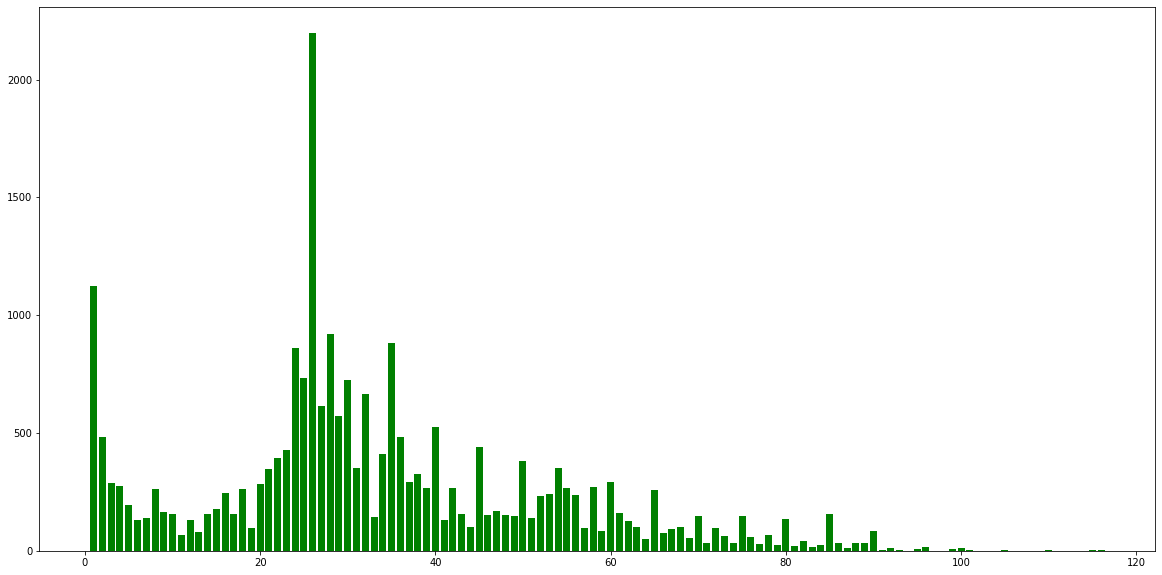

In [ ]:
plt.figure(figsize=(20, 10))
plt.bar(count_per_age.keys(), count_per_age.values(), color='g')

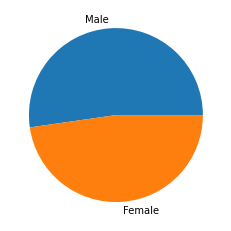

In [ ]:
plt.pie(list(count_per_gender.values()), labels=list(count_per_gender.keys()))
plt.show()

In [ ]:
def gender(n):
    if n == "0":
        return "Male"
    elif n == "1":
        return "Female"

#### The following code will show you an image in the dataset. Feel free to change the index and re-run the cell multiple times to check out other images.

Gender = Male, Age = 58


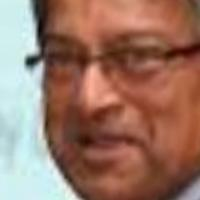

In [ ]:
# Example of a picture

np.random.seed(20)
index = np.random.randint(0, len(image_names))

test_image = image_names[index]
print("Gender = " + gender(test_image.split('_')[1]) + ", Age = " + test_image.split('_')[0])
Image(filename=test_image)

In [ ]:
try:
    os.mkdir('Data')
except FileExistsError:
    print("Data Folder already created")
try:
    os.mkdir(os.path.join('Data','Gender_Training'))
except FileExistsError:
    print("Gender_Training Folder already created")

try:
    os.mkdir(os.path.join('Data','Gender_Training','Male'))
except FileExistsError:
    print("Male Folder already created")
try:
    os.mkdir(os.path.join('Data','Gender_Training','Female'))
except FileExistsError:
    print("Female Folder already created")

Split Images based on gender to Folders don't run it if folder exists

In [ ]:
for image in image_names:
    if gender(image.split('_')[1]) == "Male":
        shutil.copyfile(image, os.path.join('Data','Gender_Training','Male',rf"{image}"))
    elif gender(image.split('_')[1]) == "Female":
        shutil.copyfile(image, os.path.join('Data','Gender_Training','Female',rf"{image}"))

In [ ]:
os.listdir(os.path.join('Data','Gender_Training'))

['Male', 'Female']

Gender = Male, Age = 19


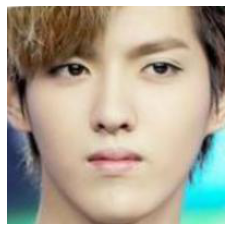

Gender = Male, Age = 43


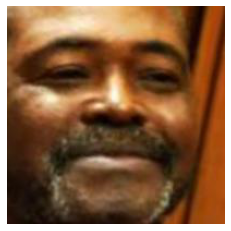

Gender = Female, Age = 61


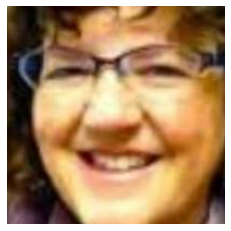

Gender = Female, Age = 35


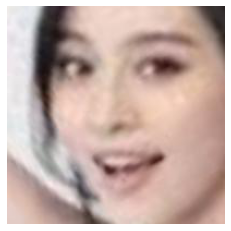

In [ ]:
pic_index = 50
male_images = os.listdir(os.path.join('Data','Gender_Training','Male'))
female_images = os.listdir(os.path.join('Data','Gender_Training','Female'))
next_male = [fname for fname in male_images[pic_index-2:pic_index]]
next_female = [fname for fname in female_images[pic_index-2:pic_index]]


for i, img_path in enumerate(next_male+next_female):
  print("Gender = " + gender(img_path.split('_')[1]) + ", Age = " + img_path.split('_')[0])
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

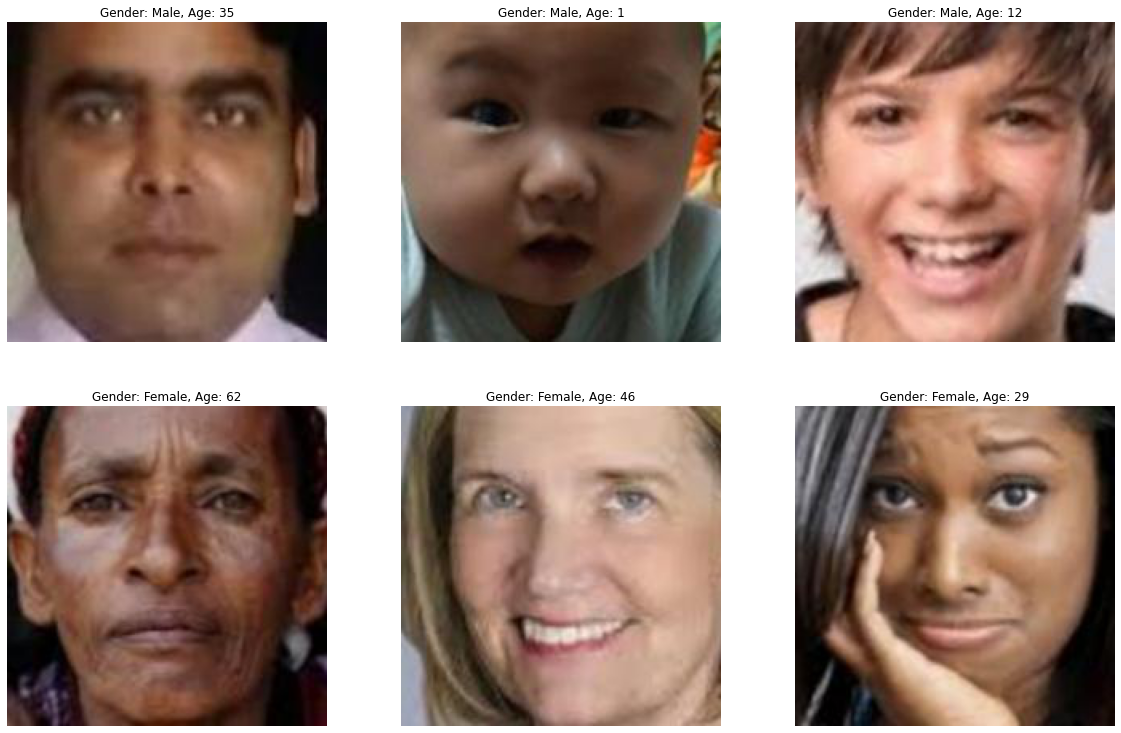

In [ ]:
pic_index = 39

male_images = os.listdir(os.path.join('Data','Gender_Training','Male'))
female_images = os.listdir(os.path.join('Data','Gender_Training','Female'))
next_male = [fname for fname in male_images[pic_index-3:pic_index]]
next_female = [fname for fname in female_images[pic_index-3:pic_index]]

plt.figure(figsize=(20, 20))
for i, img_path in enumerate(next_male+next_female):
    plt.subplot(3,3,i+1)
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('Off')
    plt.title("Gender: " + gender(img_path.split('_')[1]) + ", Age: " + img_path.split('_')[0])
plt.show()

### Training starts here

In [ ]:
# This code block should create an instance of an ImageDataGenerator called train_datagen
# And a train_generator by calling train_datagen.flow_from_directory
train_datagen = ImageDataGenerator(rescale=1 / 255)

train_generator = train_datagen.flow_from_directory(
    os.path.join('Data','Gender_Training'),  # This is the source directory for training images
    target_size=(200, 200),  # All images will be resized to 200x200
    batch_size=10,
    # Since we use binary_cross_entropy loss, we need binary labels
    class_mode='binary')
# Expected output: 'Found 23708 images belonging to 2 classes'

Found 23708 images belonging to 2 classes.


# Model 1

In [ ]:
desired_accuracy = 0.98


class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > desired_accuracy:
            print()
            print("Reached 98.0% accuracy so cancelling training!")
            self.model.stop_training = True

In [ ]:
callbacks = MyCallback()

# This Code Block should Define and Compile the Model. Please assume the images are 200 X 200 in your implementation.
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for class ('Female') and 1 for the other ('Male')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# optimizer=RMSprop(learning_rate=0.001)
model_1.compile(loss='binary_crossentropy',
                optimizer=keras.optimizers.Adam(),
                metrics=['accuracy'])

# This code block should call model.fit and train for
# a number of epochs.
# model fitting
history = model_1.fit(
    train_generator,
    steps_per_epoch=400,
    epochs=50,
    verbose=1, callbacks=[callbacks])
# model fitting

# test model
print(round(history.history['accuracy'][-1], 2))

# Save the model
date = str(datetime.now())
date = date[:date.index('.')].replace("-","_").replace(":","_").replace(" ","_")
model_1.save(os.path.join('Data','saved',rf"model_1_{round(history.history['accuracy'][-1], 2)}_{date}.h5"))

Epoch 1/50
400/400 [==============================] - 21s 20ms/step - loss: 0.5717 - accuracy: 0.7315
Epoch 2/50
400/400 [==============================] - 8s 20ms/step - loss: 0.4052 - accuracy: 0.8198
Epoch 3/50
400/400 [==============================] - 8s 20ms/step - loss: 0.3453 - accuracy: 0.8393
Epoch 4/50
400/400 [==============================] - 8s 20ms/step - loss: 0.3351 - accuracy: 0.8503
Epoch 5/50
400/400 [==============================] - 8s 20ms/step - loss: 0.3043 - accuracy: 0.8712
Epoch 6/50
400/400 [==============================] - 8s 20ms/step - loss: 0.3038 - accuracy: 0.8655
Epoch 7/50
400/400 [==============================] - 9s 22ms/step - loss: 0.2821 - accuracy: 0.8784
Epoch 8/50
400/400 [==============================] - 8s 20ms/step - loss: 0.2720 - accuracy: 0.8798
Epoch 9/50
400/400 [==============================] - 8s 20ms/step - loss: 0.2600 - accuracy: 0.8875
Epoch 10/50
400/400 [==============================] - 8s 20ms/step - loss: 0.2488 - accur

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 64)       0

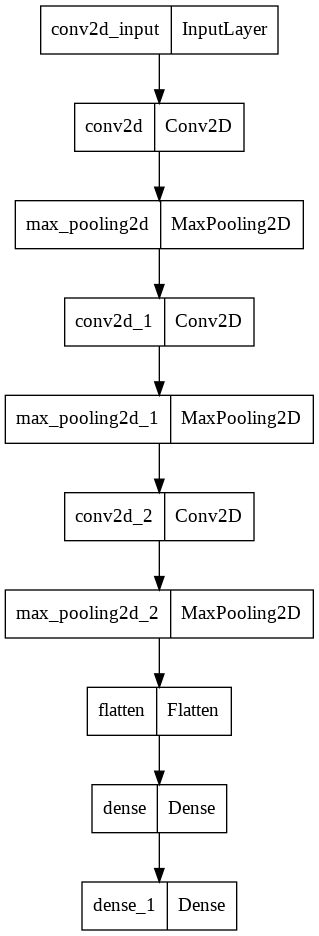

In [ ]:
tf.keras.utils.plot_model(model_1, to_file="model_1.png")

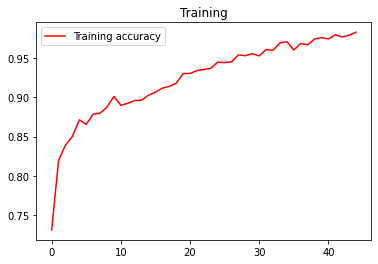

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history.history['accuracy']
loss = history.history['loss']


epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')

plt.title('Training')
plt.legend(loc=0)
plt.figure()


plt.show()

Gender = Female, Age = 30


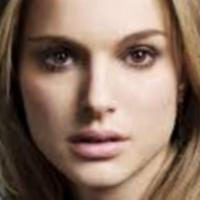

In [ ]:
# Example of a picture
np.random.seed(4)
index = np.random.randint(0, len(image_names))

test_image = image_names[index]
print("Gender = " + gender(test_image.split('_')[1]) + ", Age = " + test_image.split('_')[0])
Image(filename=test_image)

In [ ]:
class_names = ["Male", "Female"]

[[0.00678017]]
True Label: Female
Predict: Female


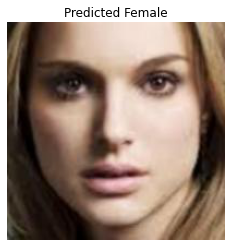

Predict: Female


In [ ]:
test_image_path = os.path.join('Data','Gender_Training',rf"{gender(test_image.split('_')[1])}",rf"{test_image}")
img = mpimg.imread(test_image_path)
plt.imshow(img)
plt.axis('Off')
img = cv2.imread(test_image_path)
img = img / 255  # rescale the image
img = cv2.resize(img, (200, 200))  # resize to same size used in training
img = np.expand_dims(img, axis=0)
pred = model_1.predict(img)
print(pred)
print(F"True Label: {gender(test_image.split('_')[1])}")
print("Predict:", end=' ')
print("Male") if pred[0][0] > 0.5 else print("Female")
plt.title(F"Predicted {class_names[round(pred[0][0]) - 1]}")
plt.show()
print("Predict:", class_names[round(pred[0][0]) - 1])

### Custom Test for Model 1

Saving 3.jpg to 3 (1).jpg

Image_Name: 3.jpg


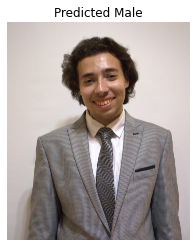

Class= Male



In [ ]:
from keras.preprocessing import image

uploaded = files.upload()
print()
for fn in uploaded.keys():
    # predicting images
    path = fn
    img = image.load_img(path, target_size=(200, 200))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model_1.predict(images, batch_size=10)
    print("Image_Name:",fn)
    img = mpimg.imread(path)
    plt.imshow(img)
    plt.axis('Off')
    plt.title(F"Predicted {class_names[round(pred[0][0]) - 1]}")
    plt.show()
    print("Class=",class_names[round(pred[0][0]) - 1])
    print()

# Model 2

In [ ]:
batch_size = 100
img_height = 200
img_width = 200
data_dir = os.path.join('Data','Gender_Training')
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = train_ds.class_names
print(class_names)

Found 23708 files belonging to 2 classes.
Using 18967 files for training.
Found 23708 files belonging to 2 classes.
Using 4741 files for validation.
['Female', 'Male']


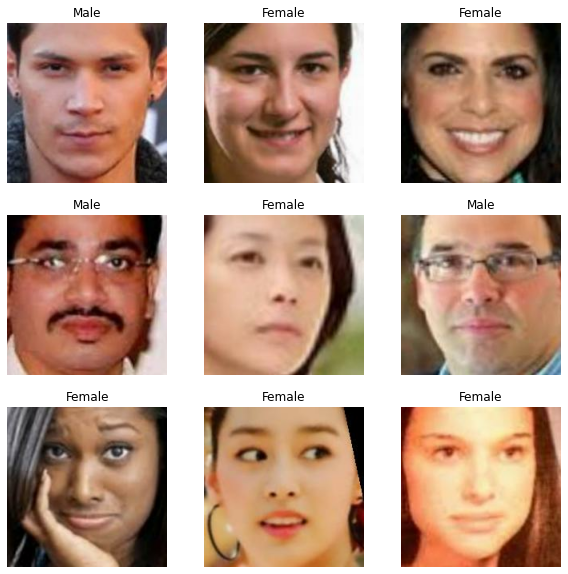

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
checkpoint_path = os.path.join('Data','saved', rf"checkpoint_model_2")
callbacks = [
    # ModelCheckpoint will save models after each epoch for retrieval later.
    keras.callbacks.ModelCheckpoint(checkpoint_path, save_best_only=True),
    # EarlyStopping will terminate training when loss ceases to improve.
    tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)
]
# This Code Block should Define and Compile the Model. Please assume the images are 200 X 200 in your implementation.
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.25),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(len(class_names))
])

model_2.compile(loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
                optimizer='adam',
                metrics=['accuracy'])

# This code block should call model.fit and train for
# a number of epochs.
# model fitting
history = model_2.fit(
    train_ds,
    validation_data=val_ds,
    epochs=100,
    verbose=1, callbacks=[callbacks])
# model fitting

# test model
print(round(history.history['accuracy'][-1], 2))
date = str(datetime.now())
date = date[:date.index('.')].replace("-","_").replace(":","_").replace(" ","_")
model_2.save(os.path.join('Data','saved',rf"model_2_{round(history.history['accuracy'][-1], 2)}_{date}.h5"))

Epoch 1/100
190/190 [==============================] - 27s 127ms/step - loss: 0.4772 - accuracy: 0.7817 - val_loss: 0.3455 - val_accuracy: 0.8441
Epoch 2/100
190/190 [==============================] - 25s 131ms/step - loss: 0.3276 - accuracy: 0.8582 - val_loss: 0.3216 - val_accuracy: 0.8665
Epoch 3/100
190/190 [==============================] - 25s 129ms/step - loss: 0.2903 - accuracy: 0.8760 - val_loss: 0.2707 - val_accuracy: 0.8872
Epoch 4/100
190/190 [==============================] - 23s 119ms/step - loss: 0.2627 - accuracy: 0.8879 - val_loss: 0.2656 - val_accuracy: 0.8834
Epoch 5/100
190/190 [==============================] - 22s 111ms/step - loss: 0.2397 - accuracy: 0.8979 - val_loss: 0.2740 - val_accuracy: 0.8848
Epoch 6/100
190/190 [==============================] - 28s 144ms/step - loss: 0.2268 - accuracy: 0.9045 - val_loss: 0.2628 - val_accuracy: 0.8891
Epoch 7/100
190/190 [==============================] - 23s 120ms/step - loss: 0.2051 - accuracy: 0.9159 - val_loss: 0.2345 -

In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 200, 200, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 99, 99, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 46, 46, 64)       

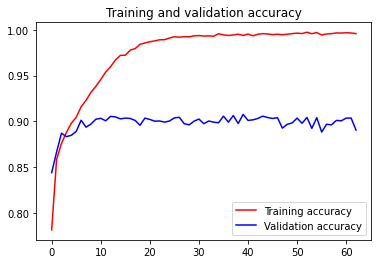

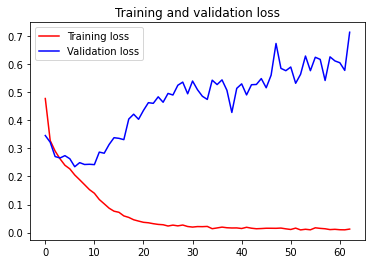

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

[[-2.4301891  2.9645715]]
True Label: Female


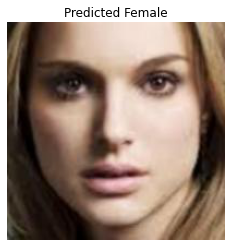

Predict: Female


In [ ]:
test_image_path = os.path.join('Data','Gender_Training',rf"{gender(test_image.split('_')[1])}",rf"{test_image}")
img = cv2.imread(test_image_path)
img = mpimg.imread(test_image_path)
plt.imshow(img)
plt.axis('Off')

img = img / 255  # rescale the image
img = cv2.resize(img, (200, 200))  # resize to same size used in training
img = np.expand_dims(img, axis=0)
pred = model_2.predict(img)
print(pred)  # will be a list of 2 elements select the element in the list with the highest probability
print(F"True Label: {gender(test_image.split('_')[1])}")
index=np.argmax(pred)  # this will be the index of the class predicted
class_name=class_names[index]  # this will be the name of the class predicted
plt.title(F"Predicted {class_name}")
plt.show()
print("Predict:",class_name)

### Custom Test for Model 2

Saving 3.jpg to 3 (2).jpg

Image_Name: 3.jpg


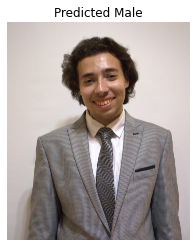

In [ ]:
from keras.preprocessing import image

uploaded = files.upload()
print()
for fn in uploaded.keys():
    # predicting images
    path = fn
    img = image.load_img(path, target_size=(200, 200))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model_2.predict(images, batch_size=10)
    print("Image_Name:",fn)
    img = mpimg.imread(path)
    plt.imshow(img)
    plt.axis('Off')
    plt.title(F"Predicted {class_names[np.argmax(pred)]}")
    plt.show()
    print()

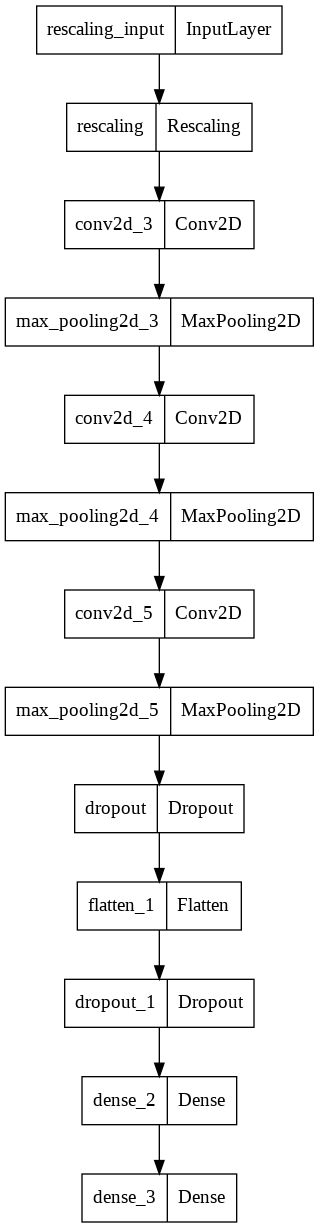

In [ ]:
tf.keras.utils.plot_model(model_2, to_file="model_2.png")

In [ ]:
from google.colab import drive
drive.mount(os.path.join('Data','saved','Drive'))

Drive already mounted at Data/saved/Drive; to attempt to forcibly remount, call drive.mount("Data/saved/Drive", force_remount=True).


In [ ]:
drive.flush_and_unmount()